In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from skimage.external import tifffile
import seaborn as sns
from skimage.external.tifffile import imread
import os
from os import listdir
from os.path import isfile, join

In [68]:
bigDir=r'Z:\CookLab\Liu\DNAdamageAnalysis\20201116'
dataFile=f'{bigDir}\\cellinfo_20201116_v10-2.csv'
data1=pd.read_csv(dataFile)

In [69]:
bigDir=r'Z:\CookLab\Liu\DNAdamageAnalysis\20210110'
dataFile=f'{bigDir}\\cellinfo_20210110_v9.csv'
data2=pd.read_csv(dataFile)

In [70]:
data=[data1,data2]

In [71]:
finalData=pd.concat(data)

C:\ProgramData\Anaconda3_reinstalled\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
finalData.head

<bound method NDFrame.head of      DAPI ch  ID  Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0          4 NaN           0           NaN             NaN               NaN   
1          4 NaN           1           NaN             NaN               NaN   
2          4 NaN           2           NaN             NaN               NaN   
3          4 NaN           3           NaN             NaN               NaN   
4          4 NaN           4           NaN             NaN               NaN   
5          4 NaN           5           NaN             NaN               NaN   
6          4 NaN           6           NaN             NaN               NaN   
7          4 NaN           7           NaN             NaN               NaN   
8          4 NaN           8           NaN             NaN               NaN   
9          4 NaN           9           NaN             NaN               NaN   
10         4 NaN          10           NaN             NaN               NaN   
11        

In [72]:
finalData=finalData.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1'])

In [73]:
finalData.to_csv(r'Z:\CookLab\Liu\DNAdamageAnalysis\cellinfo_201116-210110.csv')

In [74]:
data=pd.read_csv(r'Z:\CookLab\Liu\DNAdamageAnalysis\cellinfo_201116-210110.csv')

In [75]:
data.head()

,Unnamed: 0,DAPI ch,ID,Unnamed: 3,ab1 (EdU),ab1 (heterochromatin),ab1 ch,ab2 (53bp1 ),ab2 (heterochroamtin ),ab2 ch,...,outer_hp1_het,outer_hp1_total,outer_vol_eu,outer_vol_het,outer_vol_total,path,resultPath,totalCount,x,y
0,0,4,NaN,1.0,EdU,NaN,1,NaN,HP1,2,...,246177070.0,753323950.0,146524.0,35446.0,181970.0,Z:\CookLab\Liu\DNAdamageAnalysis\20201116\data...,Z:\CookLab\Liu\DNAdamageAnalysis\20201116\foci...,219.0,NaN,NaN
1,1,4,NaN,2.0,EdU,NaN,1,NaN,HP1,2,...,230449373.0,694233268.0,132489.0,31931.0,164420.0,Z:\CookLab\Liu\DNAdamageAnalysis\20201116\data...,Z:\CookLab\Liu\DNAdamageAnalysis\20201116\foci...,286.0,NaN,NaN
2,2,4,NaN,3.0,EdU,NaN,1,NaN,HP1,2,...,276561059.0,819062848.0,137706.0,33421.0,171127.0,Z:\CookLab\Liu\DNAdamageAnalysis\20201116\data...,Z:\CookLab\Liu\DNAdamageAnalysis\20201116\foci...,546.0,NaN,NaN
3,3,4,NaN,4.0,EdU,NaN,1,NaN,HP1,2,...,226467247.0,683013877.0,133881.0,32945.0,166826.0,Z:\CookLab\Liu\DNAdamageAnalysis\20201116\data...,Z:\CookLab\Liu\DNAdamageAnalysis\20201116\foci...,199.0,NaN,NaN
4,4,4,NaN,5.0,EdU,NaN,1,NaN,HP1,2,...,232629630.0,686590283.0,128896.0,32016.0,160912.0,Z:\CookLab\Liu\DNAdamageAnalysis\20201116\data...,Z:\CookLab\Liu\DNAdamageAnalysis\20201116\foci...,386.0,NaN,NaN


In [76]:
for i, row in data.iterrows():
    data.loc[i,'day']='d'+data.loc[i,'file'].split("_cell")[0]

In [77]:
data.day.head()

0    d20201116
1    d20201116
2    d20201116
3    d20201116
4    d20201116
Name: day, dtype: object

In [78]:
from ast import literal_eval

In [81]:
for i,row in data.iterrows():
    data.nucIntensity[i]=literal_eval(data.nucIntensity[i])

C:\ProgramData\Anaconda3_reinstalled\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
for i,row in data.iterrows():
    data.hetIntensity[i]=literal_eval(data.hetIntensity[i])
    data.euIntensity[i]=literal_eval(data.euIntensity[i])

C:\ProgramData\Anaconda3_reinstalled\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3_reinstalled\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
data.nucIntensity.dtype

dtype('O')

In [82]:
for i, row in data.iterrows():
    if data.group[i] =='APH_25ng':
        data.group[i]='APH'
    if data.group[i] == 'DOX_24H':
        data.group[i] = 'DOX'

C:\ProgramData\Anaconda3_reinstalled\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3_reinstalled\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<IPython.core.display.Javascript object>


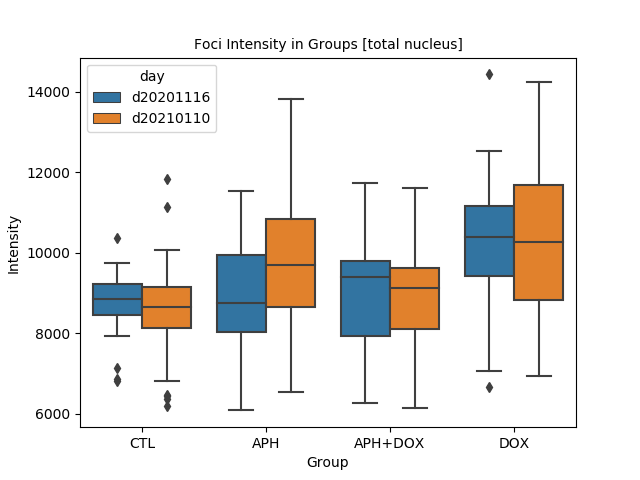

Text(0.5, 1.0, 'Foci Intensity in Groups [total nucleus]')

In [83]:
%matplotlib notebook
sns.boxplot(data=data,x='group',y=np.sum(data.nucIntensity), hue='day')
plt.xlabel('Group')
plt.ylabel('Intensity')
plt.title('Foci Intensity in Groups [total nucleus]', fontsize=10)

<IPython.core.display.Javascript object>


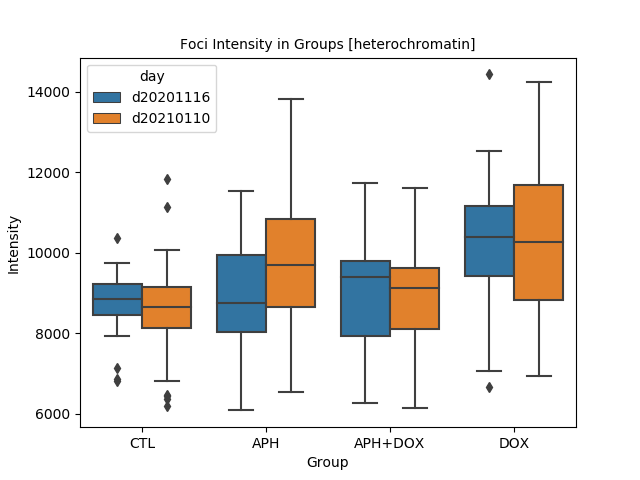

Text(0.5, 1.0, 'Foci Intensity in Groups [heterochromatin]')

In [84]:
%matplotlib notebook
sns.boxplot(data=data,x='group',y=np.sum(data.hetIntensity), hue='day')
plt.xlabel('Group')
plt.ylabel('Intensity')
plt.title('Foci Intensity in Groups [heterochromatin]', fontsize=10)

<IPython.core.display.Javascript object>


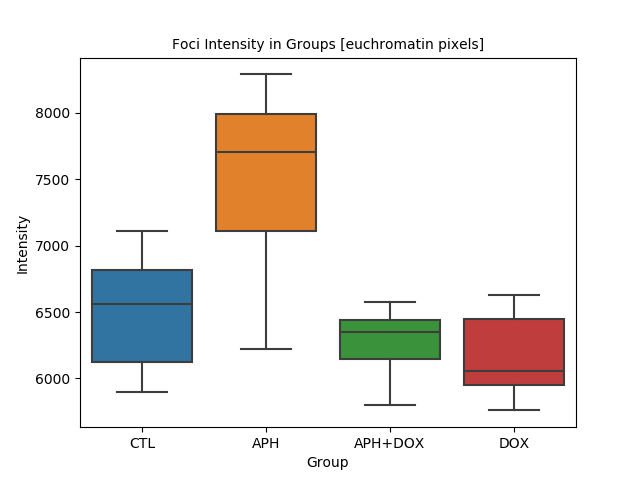

Text(0.5, 1.0, 'Foci Intensity in Groups [euchromatin pixels]')

In [87]:
%matplotlib notebook
dataLocal=data.loc[data.day=='d20201116',:]
sns.boxplot(data=dataLocal,x='group',y=np.sum(dataLocal.euIntensity))
plt.xlabel( 'Group')
plt.ylabel('Intensity')
plt.title('Foci Intensity in Groups [euchromatin pixels]', fontsize=10)

In [86]:
data.to_csv(r'Z:\CookLab\Liu\DNAdamageAnalysis\cellinfo_201116-210110.csv')